In [2]:
!pip install numpy matplotlib imageio


Animated GIF with matrices saved as: /content/transform.gif


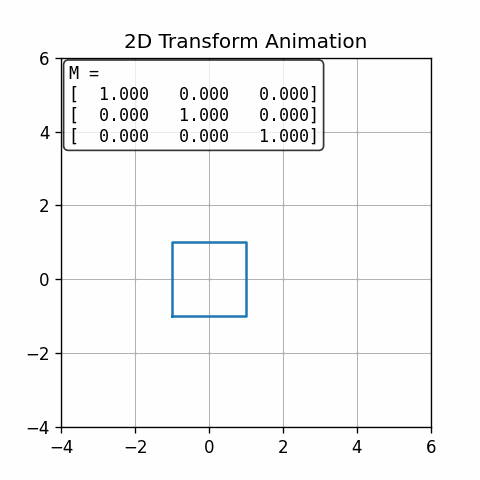

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from IPython.display import Image

# CONFIG

FRAMES = 60               # total frames
FPS = 20                  # speed (frames per second) of the GIF
TX_END, TY_END = 3.0, 2.0 # final translation
ROT_END_DEG = 360.0       # total rotation (degrees)
SX_START, SY_START = 1.0, 1.0
SX_END, SY_END = 0.5, 1.5
X_LIM = (-4, 6)           # X-axis plot limits
Y_LIM = (-4, 6)           # Y-axis plot limits

OUT_PATH = "/content/transform.gif"   # Colab

# 3x3 matrices (homogeneous coordinates)
def T(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0,  1],
    ], dtype=float)

def R(theta_rad):
    c, s = np.cos(theta_rad), np.sin(theta_rad)
    return np.array([
        [ c, -s, 0],
        [ s,  c, 0],
        [ 0,  0, 1],
    ], dtype=float)

def S(sx, sy):
    return np.array([
        [sx,  0, 0],
        [ 0, sy, 0],
        [ 0,  0, 1],
    ], dtype=float)

def apply_transform(points_xy, M):
    """Apply the 3x3 matrix M to Nx2 points -> Nx2."""
    n = points_xy.shape[0]
    homo = np.hstack([points_xy, np.ones((n, 1))])  # Nx3
    transformed = (M @ homo.T).T
    return transformed[:, :2]

def format_matrix(M):
    """Return a pretty 3x3 matrix string for on-plot display."""
    return (
        f"[{M[0,0]:7.3f} {M[0,1]:7.3f} {M[0,2]:7.3f}]\n"
        f"[{M[1,0]:7.3f} {M[1,1]:7.3f} {M[1,2]:7.3f}]\n"
        f"[{M[2,0]:7.3f} {M[2,1]:7.3f} {M[2,2]:7.3f}]"
    )

# Simple shape: square centered at the origin (closed polygon)
square = np.array([
    [-1, -1],
    [ 1, -1],
    [ 1,  1],
    [-1,  1],
    [-1, -1],
], dtype=float)

square_orig = square.copy()
frames = []

for i in range(FRAMES):
    t = i / (FRAMES - 1)  # 0 -> 1

    # Parameter interpolation
    tx = t * TX_END
    ty = t * TY_END
    theta = np.deg2rad(t * ROT_END_DEG)
    sx = SX_START + t * (SX_END - SX_START)
    sy = SY_START + t * (SY_END - SY_START)

    # Composition (order matters!)
    M = R(theta) @ T(tx, ty) @ S(sx, sy)

    # Apply transformation
    Sq = apply_transform(square_orig, M)

    # Draw frame
    fig, ax = plt.subplots(figsize=(4, 4), dpi=120)
    ax.plot(Sq[:, 0], Sq[:, 1])  # transformed shape
    ax.set_xlim(*X_LIM); ax.set_ylim(*Y_LIM)
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True)
    ax.set_title("2D Transform Animation")

    # Show current 3x3 matrix (top-left only)
    ax.text(0.02, 0.98,
            "M =\n" + format_matrix(M),
            transform=ax.transAxes, va="top", ha="left",
            family="monospace",
            bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.3"))

    # Convert plot to image (RGBA)
    fig.canvas.draw()
    w, h = fig.canvas.get_width_height()
    img = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8).reshape((h, w, 4))
    img = img[:, :, [1, 2, 3, 0]]  # ARGB -> RGBA
    frames.append(img)
    plt.close(fig)

# Save GIF
imageio.mimsave(OUT_PATH, frames, duration=1.0/FPS, loop=0)

print(f"Animated GIF with matrices saved as: {OUT_PATH}")
Image(filename=OUT_PATH)
